# WeRateDogs Data Wrangling

## Imports

In [107]:
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import tweepy
import re

In [108]:
consumer_key = 'X'
consumer_secret = 'X'
access_token = 'X'
access_secret = 'X'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## Gathering

In [109]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [110]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)
response

<Response [200]>

In [111]:
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [112]:
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [113]:
%%script false
errors = []

with open('tweet-json.txt', 'w') as output:
    for tweet_id in list(df_twitter['tweet_id']):
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error '+str(tweet_id))
            errors.append(tweet_id)

Couldn't find program: 'false'


In [114]:
columns = ['id', 'favorite_count', 'retweet_count']
data = []

with open('tweet-json.txt', 'r') as json_file: 
    tweet_json = json_file.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        
        data_row = dict((k, tweet_dict[k]) for k in columns)
        data.append(data_row)
        
        tweet_json = json_file.readline()
    
df_tweets = pd.DataFrame.from_dict(data)

In [115]:
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing

In [116]:
df_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


***We can see here that there is some problems with column 'name'. It filled with 'a' which is clearly not a name***

In [117]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

***There are 181 retweets and 78 tweet replies which need to be removed.***
***Also, timestamp should be DateTime.***

In [118]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

***Here there is some nulls in 'expanded_urls' which should be removed.***

In [119]:
df_twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

***Many cases here are not equal to 10***

In [120]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


***As we see in column 'source' it is clearly not readable format and it must be changed.***
***Also the cloumns 'doggo', 'floofer', 'pupper' and 'puppo' better to be merged for easier access and more clean***

In [121]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


***First, column 'jpg_url' is unnecessary, because we have the tweets urls which contain's the image it self along with its url.***

***Second, columns in this file should be renamed into more clear names.***

In [122]:
df_image.p1

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [123]:
df_image.p2

0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

In [124]:
df_image.p3

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

***Here we can see that there are capitalization inconsistency in those columns, and that should be fixed.***

## Quality Issues

1) Invalid entries in file 'df_twitter' column 'name'.

2) Coulmn 'timestamp' should be DateTime instead of string.

3) In many cases 'rating_denominator' is not equal to 10.

4) There are some missing data in column 'expanded_urls'.

5) Column 'source' should be converted into a readable format.

6) Keeping only useful columns for the analysis and removeing unnecessary columns.

7) Renaming some columns in file 'df_image' to more explanatory names.

8) Columns 'p1', 'p2' and 'p3' have inconsistent capitalization.

## Tidiness Issues

1) Combine dog stage into one column

2) Data files 'df_twitter', 'df_image' and 'df_tweets' should be combined into one master file.

## Cleaning

In [125]:
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

### Define

    Remove retweets rows, since we are interested in the acual tweets only.

### Code

In [126]:
df_twitter_clean.retweeted_status_id.isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: retweeted_status_id, Length: 2356, dtype: bool

In [127]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]

### Test

In [128]:
df_twitter_clean.retweeted_status_id.isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: retweeted_status_id, Length: 2175, dtype: bool

### Define

    Replace dogs with invalid name(lowercase names) to None.

### Code

In [129]:
# Store all lowercase names
names = df_twitter_clean.name.str.contains('^[a-z]', regex = True)
# Rename all to None
df_twitter_clean.loc[names, 'name'] = "None"

### Test

In [130]:
df_twitter_clean['name'].value_counts()

None       784
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Sully        1
Joshwa       1
Darby        1
Sprout       1
Ralf         1
Name: name, Length: 931, dtype: int64

### Define

    Change coulmn 'timestamp' to be DateTime.

### Code

In [131]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean['timestamp'] = df_twitter_clean.timestamp.dt.floor('s')

### Test

In [132]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Define

    Fix 'rating_denominator' if not equal to 10.

### Code

In [133]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.rating_denominator == 10]

### Test

In [134]:
df_twitter_clean['rating_denominator'].value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Define

    Drop missing data in column 'expanded_urls'.

### Code

In [135]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.expanded_urls.notnull()]

### Test

In [136]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2099 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   2099 non-null   datetime64[ns, UTC]
 4   source                      2099 non-null   object             
 5   text                        2099 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2099 non-null   int64           

### Define

    Convert column 'source' into readable format

### Code

In [137]:
df_twitter_clean['source'] = df_twitter_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [138]:
df_twitter_clean['source'].value_counts()

Twitter for iPhone     1967
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Define

    Combine dog stage columns 'doggo', 'floofer', 'pupper', and 'puppo'.

### Code

In [139]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
df_twitter_clean = df_twitter_clean.apply(get_dog_stage, axis=1)

# Drop the redundant columns
df_twitter_clean = df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [140]:
df_twitter_clean.dog_stage.value_counts()

None             1761
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

### Define

    Renaming some columns in file 'df_image' to more explanatory names.

### Code

In [141]:
df_image_clean.rename(columns={'p1': 'Prediction_1', 'p1_conf': 'Prediction_1_conf', 'p1_dog': 'Prediction_1_dog',
                               'p2': 'Prediction_2', 'p2_conf': 'Prediction_2_conf', 'p2_dog': 'Prediction_2_dog',
                               'p3': 'Prediction_3', 'p3_conf': 'Prediction_3_conf', 'p3_dog': 'Prediction_3_dog'
                              }, inplace=True)

### Test

In [142]:
df_image_clean.head(1)

,tweet_id,jpg_url,img_num,Prediction_1,Prediction_1_conf,Prediction_1_dog,Prediction_2,Prediction_2_conf,Prediction_2_dog,Prediction_3,Prediction_3_conf,Prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Define

    Columns 'p1', 'p2' and 'p3' all to lowercase.

### Code

In [143]:
df_image_clean['Prediction_1'] = df_image_clean['Prediction_1'].str.lower()
df_image_clean['Prediction_2'] = df_image_clean['Prediction_2'].str.lower()
df_image_clean['Prediction_3'] = df_image_clean['Prediction_3'].str.lower()

### Test

In [144]:
df_image_clean['Prediction_1']

0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: Prediction_1, Length: 2075, dtype: object

In [145]:
df_image_clean['Prediction_2']

0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english_springer
2071    labrador_retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: Prediction_2, Length: 2075, dtype: object

In [146]:
df_image_clean['Prediction_3']

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2070    german_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: Prediction_3, Length: 2075, dtype: object

### Define

    Merge all clean data files.

### Code

In [147]:
df_tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
df_master = df_twitter_clean.copy()

df_master = pd.merge(left=df_master, right=df_tweets_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_master = df_master.merge(df_image_clean, on = 'tweet_id', how = 'inner')

### Test

In [148]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1976 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   1976 non-null   datetime64[ns, UTC]
 4   source                      1976 non-null   object             
 5   text                        1976 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      float64            
 9   expanded_urls               1976 non-null   object             
 10  rating_numerator            1976 non-null   int64           

### Define

    Drop unnecessary columns 

### Code

In [149]:
unnecessary = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
               'retweeted_status_timestamp', 'jpg_url']

df_master = df_master.drop(unnecessary, axis = 1)

### Test

In [150]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1976 non-null   int64              
 1   timestamp           1976 non-null   datetime64[ns, UTC]
 2   source              1976 non-null   object             
 3   text                1976 non-null   object             
 4   expanded_urls       1976 non-null   object             
 5   rating_numerator    1976 non-null   int64              
 6   rating_denominator  1976 non-null   int64              
 7   name                1976 non-null   object             
 8   dog_stage           1976 non-null   object             
 9   favorite_count      1976 non-null   int64              
 10  retweet_count       1976 non-null   int64              
 11  img_num             1976 non-null   int64              
 12  Prediction_1        1976 non-null 

## Storing Master File

In [151]:
df_master.to_csv('twitter_archive_master.csv')

## Visualizations and Insights

In [152]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,Prediction_1_conf,Prediction_2_conf,Prediction_3_conf
count,1.976000e+03,1976.000000,1976.0,1976.000000,1976.000000,1976.000000,1976.000000,1.976000e+03,1.976000e+03
mean,7.360217e+17,11.698381,10.0,8921.050607,2769.273785,1.202935,0.593646,1.347591e-01,6.018989e-02
std,6.764193e+16,40.851248,0.0,12248.918997,4682.983010,0.561022,0.272086,1.008010e-01,5.077157e-02
min,6.660209e+17,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757942e+17,10.000000,10.0,1956.750000,622.750000,1.000000,0.362063,5.411538e-02,1.605498e-02
50%,7.084132e+17,11.000000,10.0,4141.000000,1354.500000,1.000000,0.587440,1.181350e-01,4.952715e-02
75%,7.881575e+17,12.000000,10.0,11339.750000,3224.250000,1.000000,0.844247,1.955618e-01,9.162278e-02
max,8.924206e+17,1776.000000,10.0,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


### What is the most used platform used by WeRateDogs account?

In [153]:
df_master['source'].value_counts()

Twitter for iPhone    1937
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

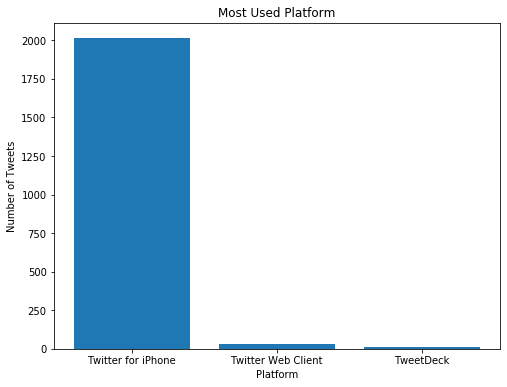

In [154]:
source = ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
counts = [2014, 30, 11]

fig,ax = plt.subplots(figsize = (8,6))
ax.bar(source, counts, width = 0.8)
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Platform')
plt.title("Most Used Platform")
plt.show()

***We can see clearly that the iphone platform is the most dominant among the others***

### Popular Dog Name

In [155]:
df_master['name'].value_counts()

None       629
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
Dwight       1
Shelby       1
Kota         1
Shadoe       1
Ralf         1
Name: name, Length: 912, dtype: int64

***It appears that Charlie is the most popular dog name but not by far.***

### What Dog Stage Get The Most Tweets?

In [156]:
df_master['dog_stage'].value_counts()

None             1670
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

(-1.2879464954626088,
 1.234046017799168,
 -1.2215265016498433,
 1.4192507289661622)

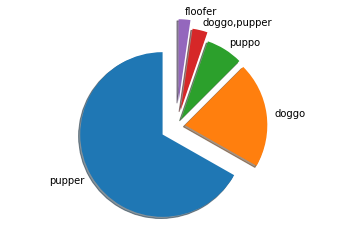

In [157]:
counts = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:5]
stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:5]
explode = (0.2, 0.1, 0.1, 0.2, 0.3) 

fig, ax = plt.subplots()
ax.pie(counts, explode = explode, labels = stages, shadow = True, startangle = 90)
ax.axis('equal')

***Dogs in Pupper stage get the most tweets***

### What Dog Breed Get The Most Tweets?

In [158]:
df_master['Prediction_1'].value_counts()

golden_retriever      135
labrador_retriever     92
pembroke               88
chihuahua              79
pug                    54
                     ... 
coral_reef              1
king_penguin            1
rain_barrel             1
limousine               1
pedestal                1
Name: Prediction_1, Length: 374, dtype: int64

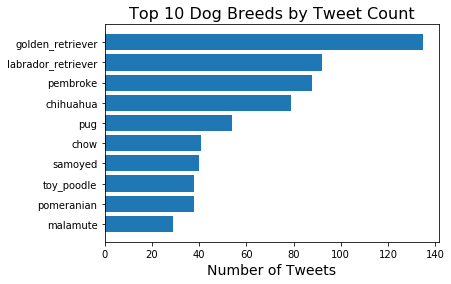

In [159]:
counts = list(df_master[df_master['Prediction_1'] != 'none']['Prediction_1'].value_counts())[0:10]
breeds = df_master[df_master['Prediction_1'] != 'none']['Prediction_1'].value_counts().index.tolist()[0:10]


plt.barh(breeds, counts)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

***The bar chart above shows that the Golden Retriever breed is the most breed by tweet count, with 146 tweets.***